In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam

from sklearn.model_selection import cross_val_score
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from bayes_opt import BayesianOptimization
import keras_tuner

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

        
        
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Read & Explor data

In [46]:
data = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [48]:
data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


# null values

In [49]:
data.isnull().sum().sort_values()

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

- No null in data

# check duplicates

In [50]:
data.duplicated().sum()

43

In [51]:
data.drop_duplicates(inplace=True)

In [52]:
data.reset_index(inplace=True)

In [53]:
data.drop(columns=["index"], inplace=True)

In [54]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data.shape

(59957, 785)

- 43 sample was duplicated so i dropped them

In [56]:
data["label"].value_counts()

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

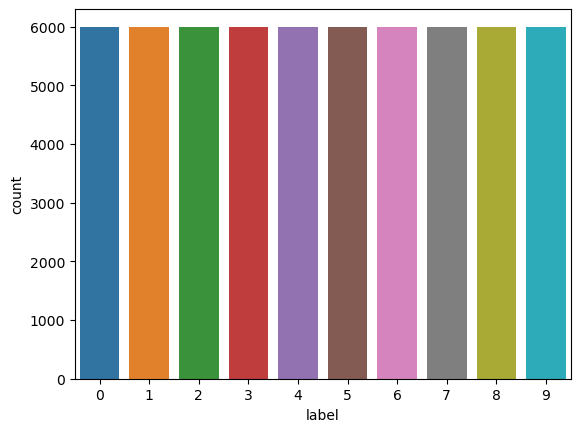

In [57]:
sns.countplot(data = data, x="label")

- label is balanced

# Split data to features & label

In [58]:
X = data.drop(columns=["label"])
y = data['label']

In [59]:
X.iloc[0]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59957 entries, 0 to 59956
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.6 MB


# Normalization

In [61]:
X = X/255

# Draw some image

In [62]:
images = X.values.reshape(len(X),28,28,1)

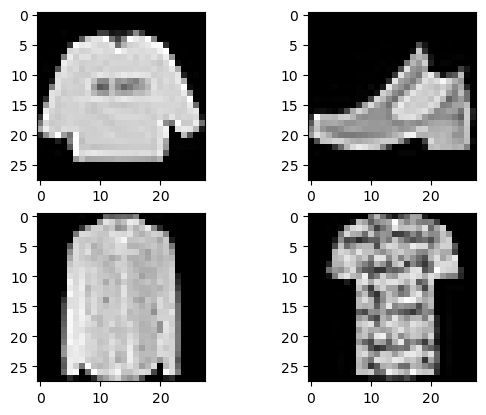

In [63]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(images[0], cmap="gray")
axarr[0,1].imshow(images[1], cmap="gray")
axarr[1,0].imshow(images[2], cmap="gray")
axarr[1,1].imshow(images[3], cmap="gray")

# Correlation

In [64]:
corr = data.corr()
corr1 = corr.iloc[:40,:40]
corr2 = corr.iloc[40:80,40:80]
corr3 = corr.iloc[80:120,80:120]
corr4 = corr.iloc[120:160,120:160]

<AxesSubplot:>

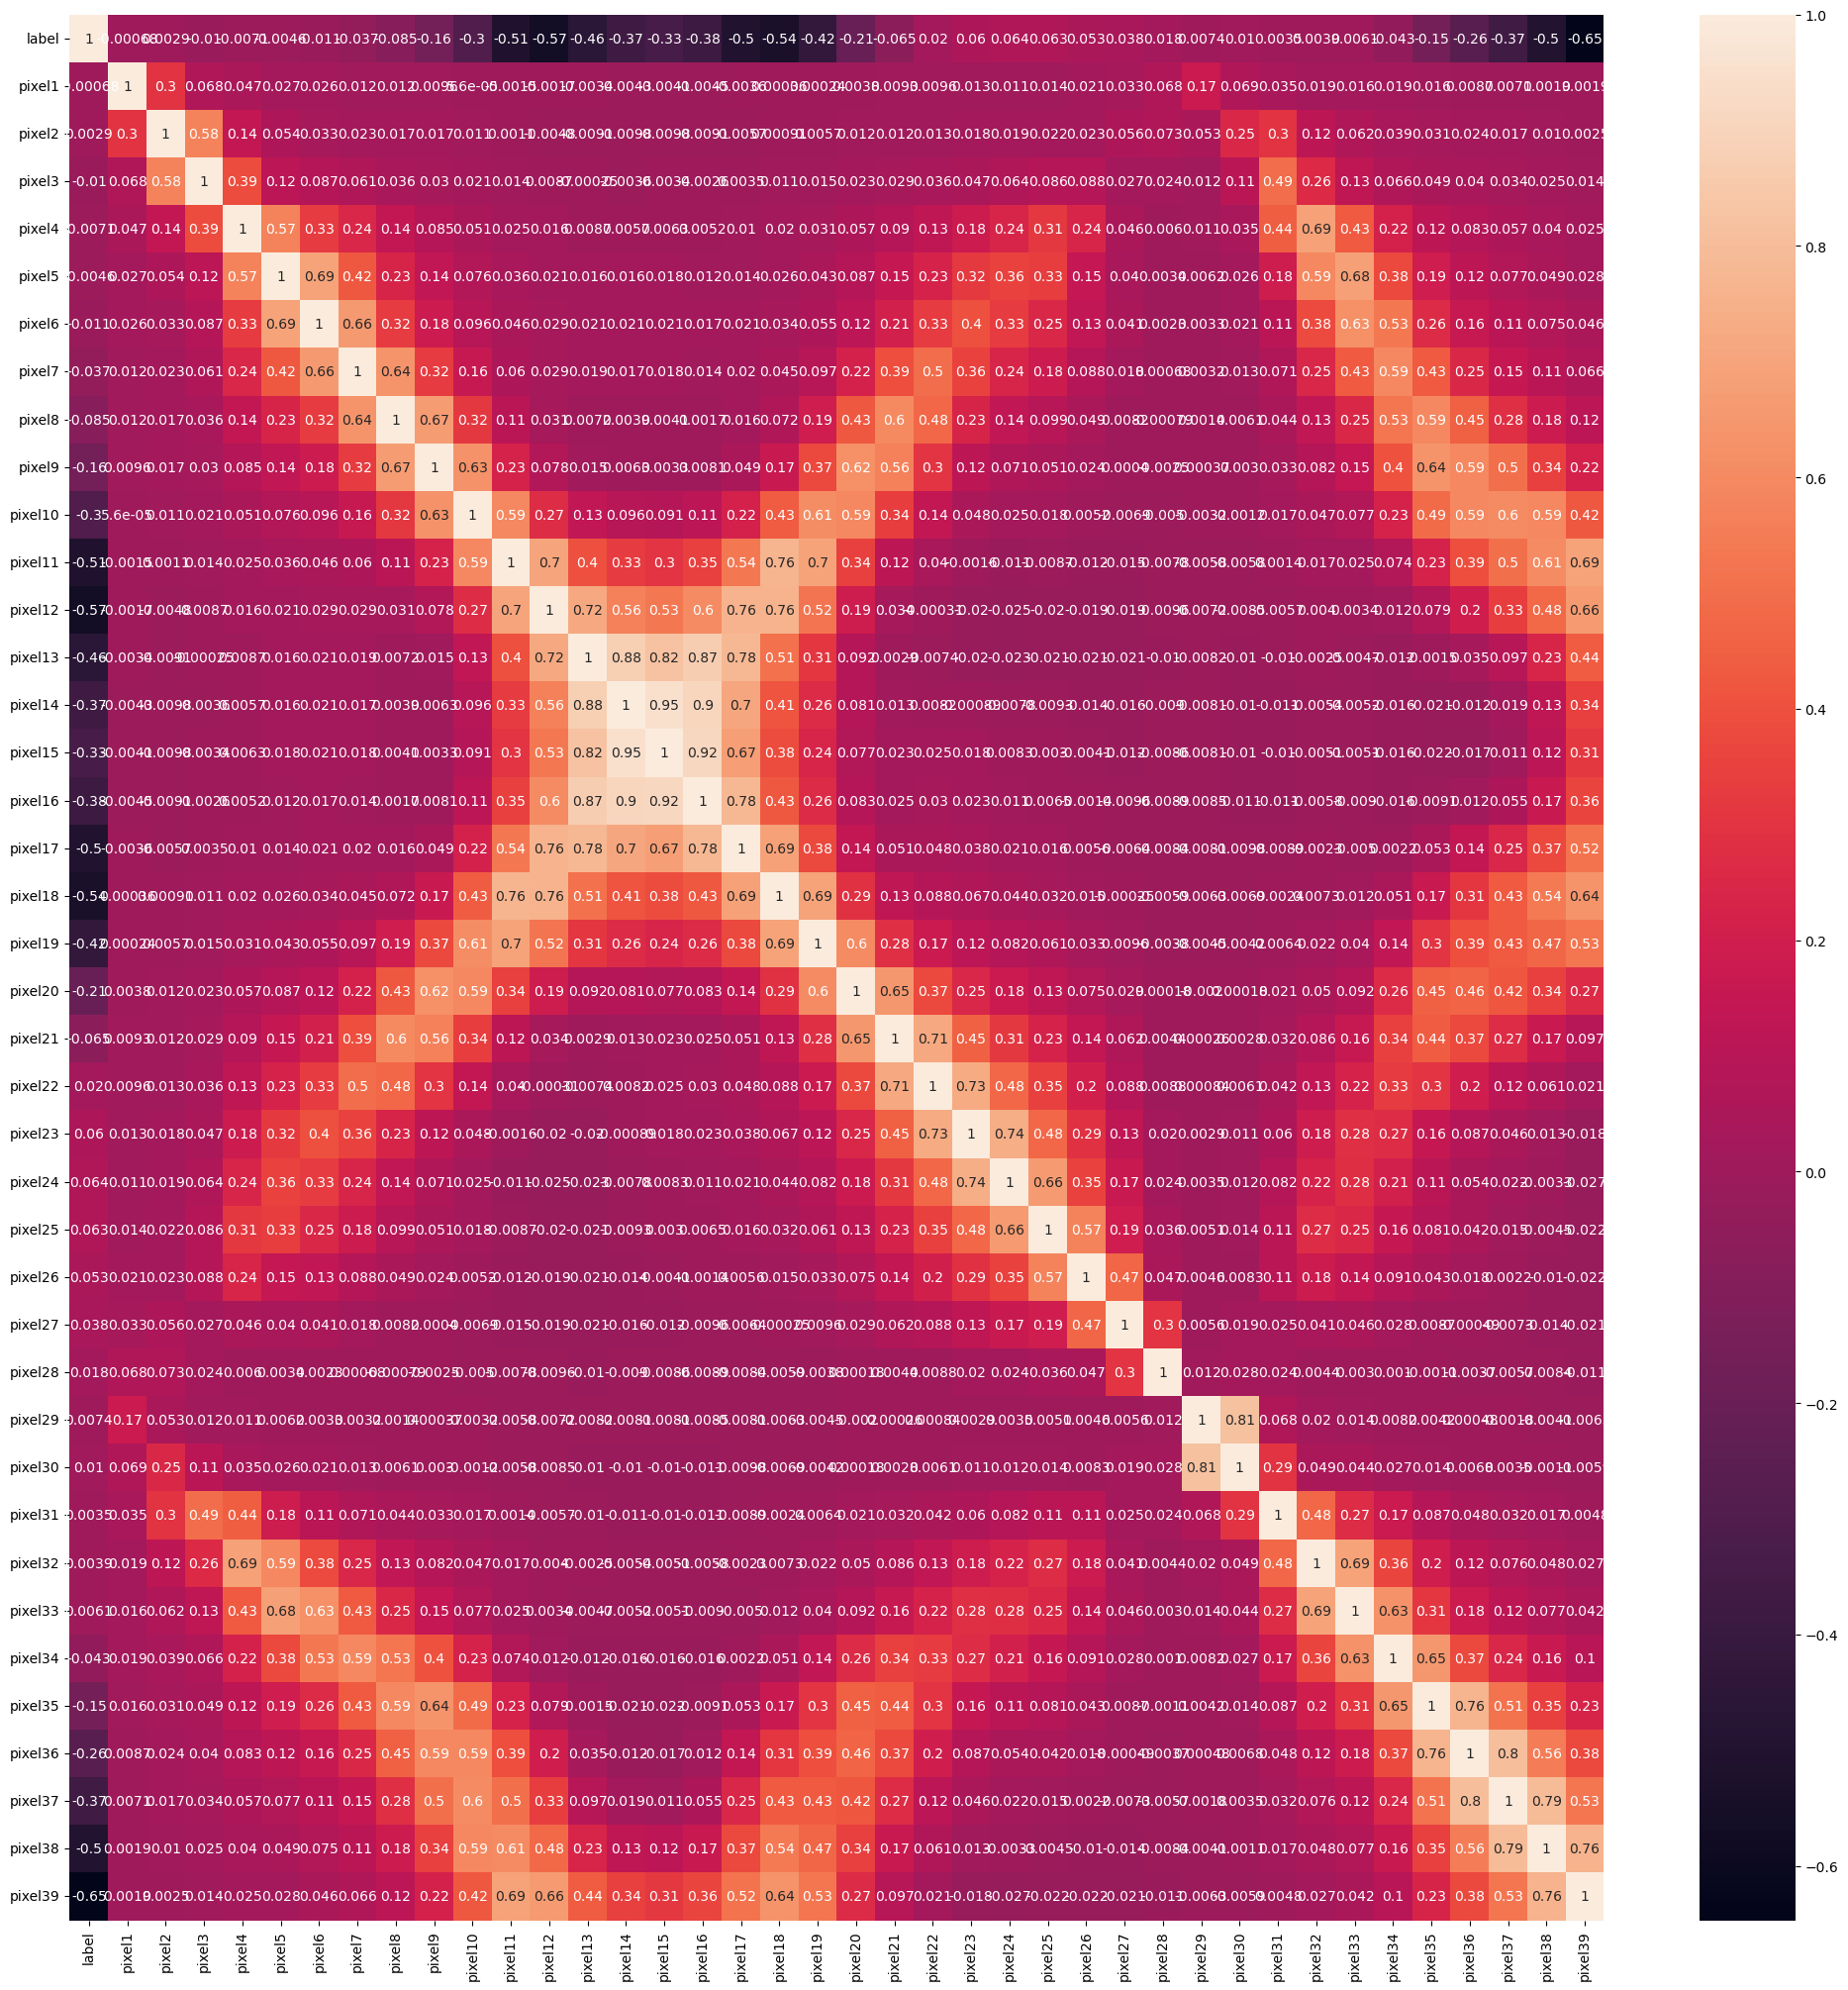

In [65]:
plt.figure(figsize=(25,25))
sns.heatmap(corr1,annot=True)

# Split data train & validation

In [66]:
X_train, X_val, y_train, y_val = train_test_split(images, y, test_size=0.1, shuffle= True, random_state=100, stratify=y )

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(53961, 28, 28, 1)
(53961,)
(5996, 28, 28, 1)
(5996,)


Build 

# Keras tuner

In [68]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    
    model.add(Dense(hp.Choice('units', [120, 240]),activation='relu'))
    model.add(Dense(20, activation= "relu"))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(hp.Choice("lr",[0.001,0.01,0.1])))
    return model

In [69]:
Bayse_tuner = keras_tuner.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5, overwrite=True)

In [70]:
Bayse_tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
best_model = Bayse_tuner.get_best_models()[0]

Trial 5 Complete [00h 07m 23s]
val_accuracy: 0.9082722067832947

Best val_accuracy So Far: 0.9082722067832947
Total elapsed time: 00h 36m 56s


In [71]:
parameters = Bayse_tuner.get_best_hyperparameters()[0]

In [72]:
print(parameters.get("lr"))
print(parameters.get("units"))

0.001
240


In [73]:
best_model

# K_folds

In [74]:

# value of K is 5.
skf = StratifiedKFold(n_splits=5)

Train Accuracy: 0.938
Train loss: 0.165
Test Accuracy: 0.900
Test loss: 0.282


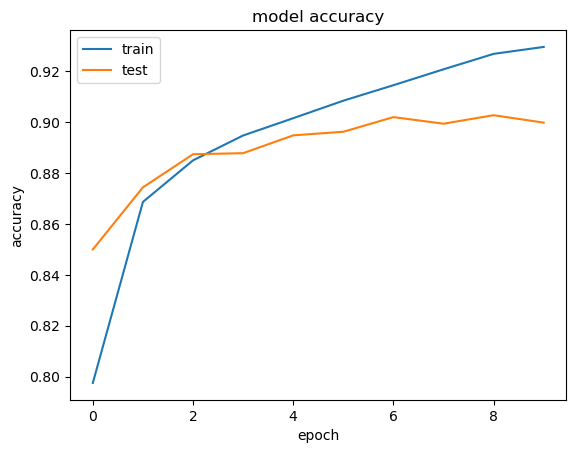

********************************************************************************
Train Accuracy: 0.944
Train loss: 0.149
Test Accuracy: 0.906
Test loss: 0.277


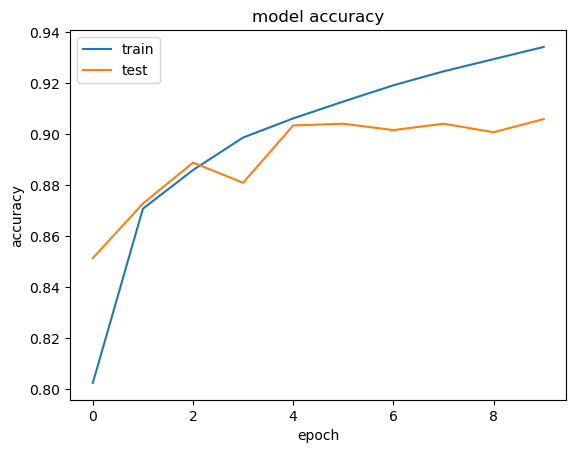

********************************************************************************
Train Accuracy: 0.943
Train loss: 0.152
Test Accuracy: 0.907
Test loss: 0.279


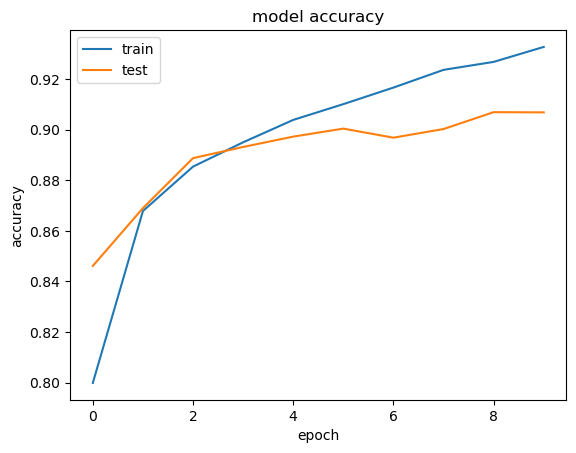

********************************************************************************
Train Accuracy: 0.941
Train loss: 0.161
Test Accuracy: 0.902
Test loss: 0.276


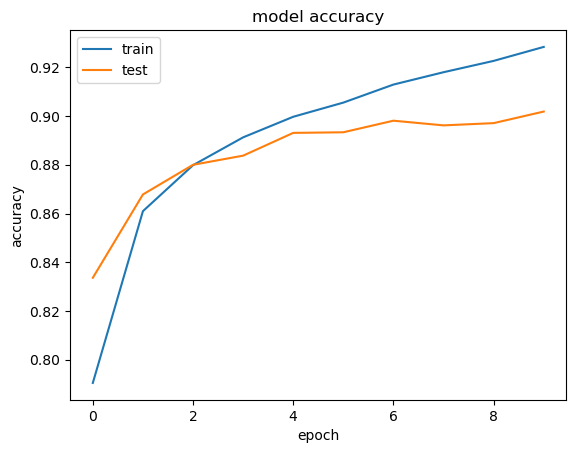

********************************************************************************
Train Accuracy: 0.936
Train loss: 0.174
Test Accuracy: 0.903
Test loss: 0.282


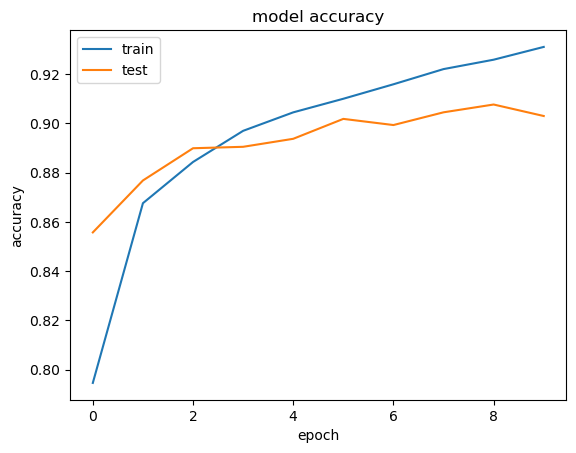

********************************************************************************


In [75]:
acc_list = []
acc_t_list = []
loss_list = []
loss_t_list = []

for train_index, test_index in skf.split(images, y):
    Xtrain = images[train_index,:]
    ytrain = y.loc[train_index]
    Xval = images[test_index,:]
    yval = y.loc[test_index]
    
    
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    
    model.add(Dense(units=240,activation='relu'))
    model.add(Dense(20, activation= "relu"))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.001))
    history = model.fit(Xtrain, ytrain,epochs=10, verbose=0,validation_data=(Xval, yval))
    
    
    loss_t, acc_t = model.evaluate(Xtrain, ytrain, verbose=0)
    loss, acc = model.evaluate(Xval, yval, verbose=0,)
    
   
    print('Train Accuracy: %.3f' % acc_t)
    print('Train loss: %.3f' % loss_t)
    print('Test Accuracy: %.3f' % acc)
    print('Test loss: %.3f' % loss)
   
    acc_list.append(acc)
    loss_list.append(loss)
    acc_t_list.append(acc_t)
    loss_t_list.append(loss_t)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    

    
    print("*" * 80)

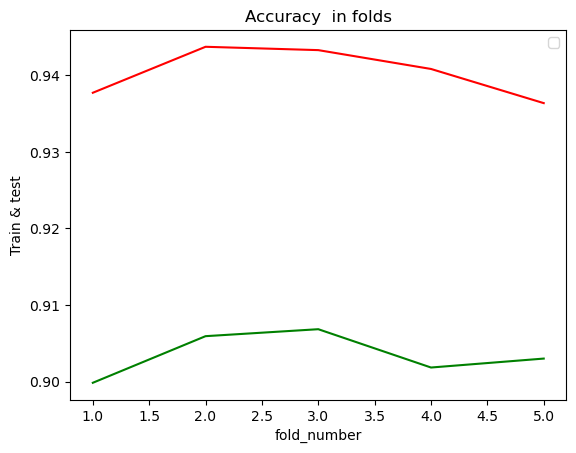

In [76]:
plt.plot(np.arange(1,6) , acc_list, color='green' )
plt.plot(np.arange(1,6) , acc_t_list, color='red')
plt.legend()
plt.xlabel("fold_number")
plt.ylabel("Train & test")
plt.title("Accuracy  in folds")
plt.show()

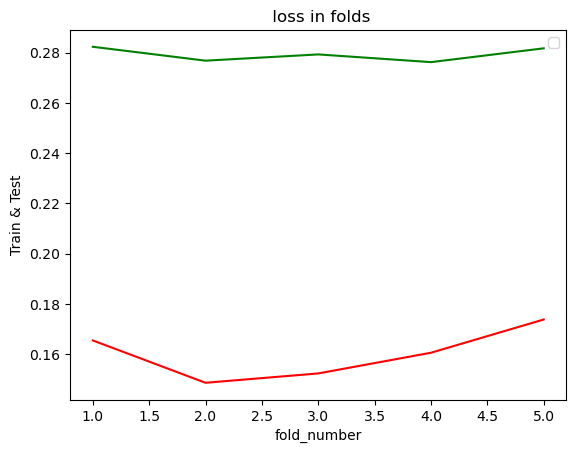

In [77]:
plt.plot(np.arange(1,6) , loss_list, color='green' )
plt.plot(np.arange(1,6) , loss_t_list, color='red')
plt.legend()
plt.xlabel("fold_number")
plt.ylabel("Train & Test")
plt.title(" loss in folds")
plt.show()

# Transfer learning

## ResNet

In [ ]:
model = ResNet50(include_top=False, input_shape=(32,32,3), weights='imagenet')

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(units=240, activation='relu')(output)
output = Dense(units=20, activation='relu')(output)
output = Dense(units=10, activation='softmax')(output)
model_Res = Model(model.input, output)

In [ ]:

model_Res.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr = 0.001))

In [ ]:
x_train = np.expand_dims(X_train, axis=-1)
x_train = tf.image.resize(X_train, [32,32])
x_train = tf.repeat(x_train,3, axis=-1)


In [ ]:
x_train.shape

In [ ]:
tf.config.run_functions_eagerly(True)
model_Res.fit(x_train, y_train,epochs=10, batch_size=128, verbose=0)

In [ ]:
x_val = np.expand_dims(X_val, axis=-1)
x_val = tf.image.resize(X_val, [32,32])
x_val = tf.repeat(x_val,3, axis=-1)

In [ ]:
loss_t, acc_t = model_Res.evaluate(x_train, y_train, verbose=0)
loss, acc = model_Res.evaluate(x_val, y_val, verbose=0)

print("Train accuracy= " + str(acc_t) + " & Train loss= " + str(loss_t))
print("test accuracy= " + str(acc) + " & test loss= " + str(loss))

## VGG16

In [ ]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32, 3))

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False
    
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(240, activation='relu')(output)
output = Dense(20, activation='relu')(output)
output = Dense(units=10, activation='softmax')(output)
model_vgg = Model(model.input, output)

In [ ]:
model_vgg.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr = 0.001))

In [ ]:
model_vgg.fit(x_train, y_train,epochs=10, batch_size=128, verbose=0)

In [ ]:
loss_t, acc_t = model_vgg.evaluate(x_train, y_train, verbose=0)
loss, acc = model_vgg.evaluate(x_val, y_val, verbose=0)

print("Train accuracy= " + str(acc_t) + " & Train loss= " + str(loss_t))
print("test accuracy= " + str(acc) + " & test loss= " + str(loss))